In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torch.utils.data import DataLoader,random_split
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import fastai
import fastai.tabular
from fastai.vision.all import *
from fastai.data.core import DataLoaders

# import sys 
# sys.path.insert(0, '/home/gridsan/ssarangerel/mocat-ml')

from CNN import *
import random, os, h5py, json

In [6]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

path = "/home/gridsan/ssarangerel/mocat-ml/"
with open(f'{path}data_numpy/data_config.json', "r") as outfile:
    data = json.load(outfile, strict=False)
    
extent = list(data['extent'])
data_numpy = np.load(f'{path}data_numpy/data.npy')
num_sim, batch_size, split, d = 100, 8192, 0.95, 256

indices = [i for i in range(num_sim)]
random.shuffle(indices)

train_data = CustomDataset(data_numpy, indices[:int(split * num_sim)], device)
val_data = CustomDataset(data_numpy, indices[int(split * num_sim):], device)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)

autoenc = AutoEncoder(d).to(device)
loss_fn = F.mse_loss

Selected device: cuda


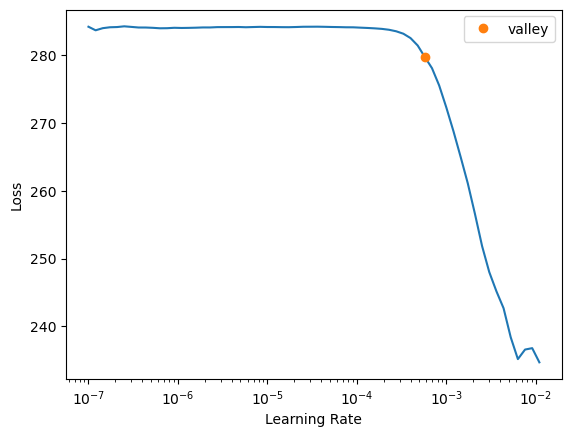

In [7]:
dls = DataLoaders.from_dsets(train_data, val_data, bs = batch_size)
learn = Learner(dls, autoenc, loss_func = F.mse_loss)
lr = learn.lr_find().valley

params_to_optimize = [{'params': autoenc.parameters()}]
optimizer = torch.optim.Adam(params_to_optimize, lr=lr)

epoch,train_loss,valid_loss,time
0,283.694824,282.039307,00:21
1,280.318665,268.305145,00:21
2,251.530823,181.173920,00:21
3,194.495392,98.804832,00:21
4,138.823639,57.053223,00:21
5,98.475601,43.052879,00:21
6,72.574684,37.210587,00:21
7,55.590363,31.292402,00:21
8,43.967701,28.780142,00:21
9,36.650398,27.411133,00:18


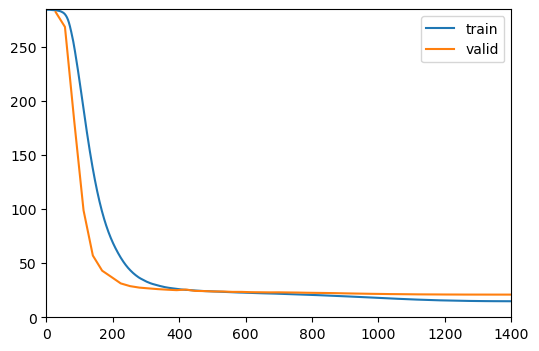

In [8]:
learn.fit_one_cycle(50, lr, cbs=[ShowGraphCallback()])

In [ ]:
#converged around epoch 30 and n_epochs = 35 is gonna be used in optuna